# Nama    : Narendra Nusantara Handradika
# NIM     : 2502018064
# Major   : Data Science

## Video : https://drive.google.com/drive/folders/1q9-J2MHn5iYa6jVMN4CDNtUL3jEwJRFW?usp=sharing 

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2023-07-06 05:10:37.739291: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 05:10:38.495572: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# !pip install scikit-learn==0.24

# **Read Data**

In [3]:
apple = pd.read_csv('AAPL.csv')
amd = pd.read_csv('AMD.csv')

Menampilkan 5 data teratas dari Apple Inc. dan Advanced Micro Devices Inc.

In [4]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [5]:
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


# **Define Visualization function for EDA**

In [6]:
# Pairplot untuk melihat hubungan antara variabel-fitur
def pairplott(data):
  sns.pairplot(data[['Open', 'High', 'Low', 'Volume']])
  plt.show()

# Korelasi antara variabel-fitur
def correlation(data):
  correlation = data[['Open', 'High', 'Low', 'Volume', 'Close']].corr()
  sns.heatmap(correlation, annot=True, cmap='coolwarm')
  plt.title('Correlation Matrix')
  plt.show()

# Visualisasi harga penutupan seiring waktu
def close_price(data):
  plt.figure(figsize=(10, 6))
  plt.plot(data['Date'], data['Close'])
  plt.xlabel('Date')
  plt.ylabel('Close Price')
  plt.title('Close Price Over Time')
  plt.show()

def analyze_stock_data(data):
    # Konversi kolom 'Date' menjadi tipe data datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Analisis tren harga penutupan
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month

    monthly_avg_close = data.groupby(['Year', 'Month'])['Close'].mean().reset_index()
    palette = sns.color_palette("husl", len(monthly_avg_close['Year'].unique()))

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Month', y='Close', hue='Year', data=monthly_avg_close)
    plt.xlabel('Month')
    plt.ylabel('Average Close Price')
    plt.title('Monthly Average Close Price by Year')
    plt.show()

    # Analisis volume perdagangan
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Volume'], bins=20)
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.title('Volume Distribution')
    plt.show()

    # Analisis perubahan harga harian
    data['Daily_Return'] = data['Close'].pct_change() * 100

    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Daily_Return'])
    plt.xlabel('Date')
    plt.ylabel('Daily Return (%)')
    plt.title('Daily Return Over Time')
    plt.show()

# **Apple Inc. Analysis**

In [7]:
# menampilkan informasi tentang dataset
apple.info()

# menampilkan ringkasan statistik datase
apple.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


- Jumlah total dataset adalah 9909, yang mencakup timeseries.
- Harga saham rata-rata (mean) untuk kolom 'Open', 'High', 'Low', 'Close', dan 'Adj Close' masing-masing adalah sekitar 32.60-32.94.
- Harga saham memiliki variasi yang signifikan, ditunjukkan oleh standar deviasi yang tinggi dalam kolom selain Volume.
- Harga saham perusahaan Apple pada umumnya meningkat seiring waktu, karena nilai kuartil ketiga (75%) lebih tinggi daripada nilai kuartil pertama (25%) untuk kolom selain Volume.
- Volume perdagangan rata-rata (mean) adalah sekitar 85,829,160, menunjukkan tingkat aktivitas perdagangan yang tinggi di pasar saham Apple.
- Volume perdagangan maksimum yang tercatat dalam dataset mencapai 1,855,410,000 saham, menunjukkan adanya periode dengan volume perdagangan yang sangat tinggi.
- Harga saham perusahaan Apple mencapai nilai maksimum tertinggi pada kolom selain Volume, yaitu sekitar 324.74-327.85.

In [8]:
# menampilkan data yang duplikat

apple.duplicated().sum()

0

Tidak ditemukan data yang duplikat pada dataset Apple Inc.

In [9]:
# check missing values
apple.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Tidak ditemukan adanya missing values pada dataset Apple Inc.

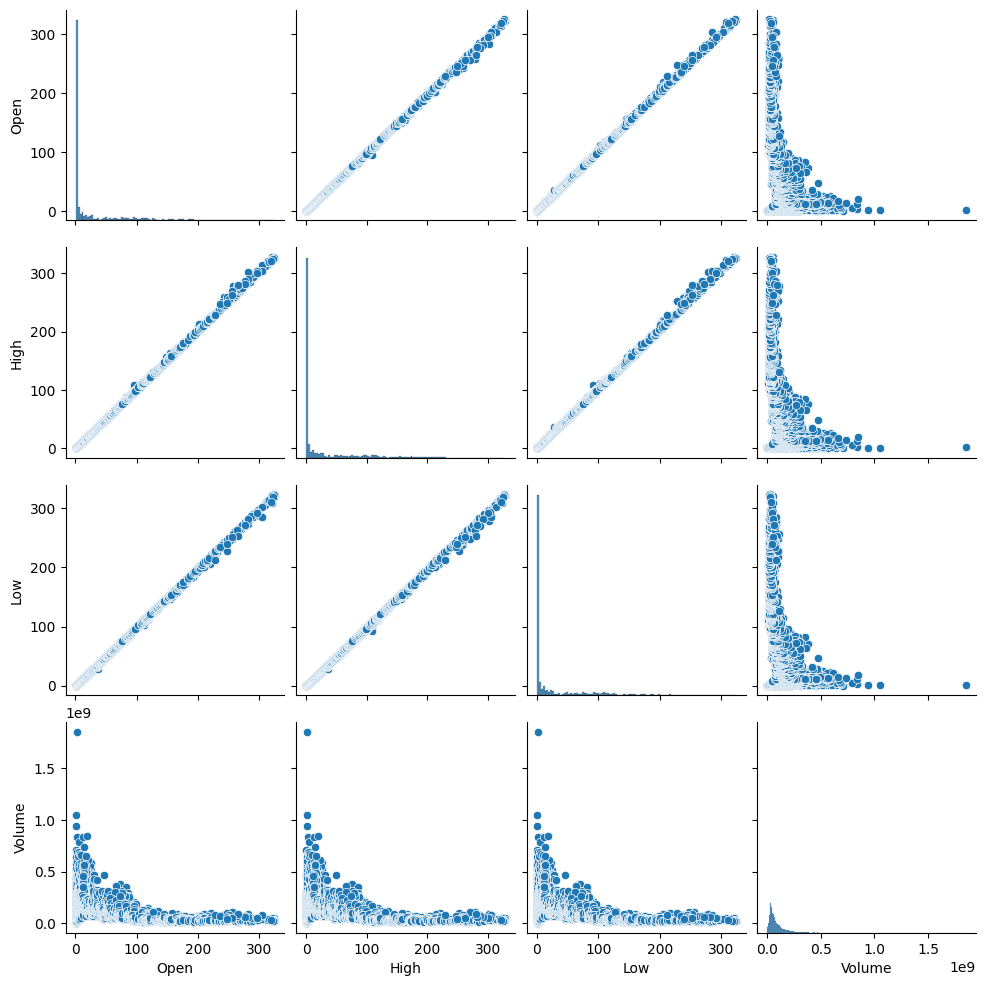

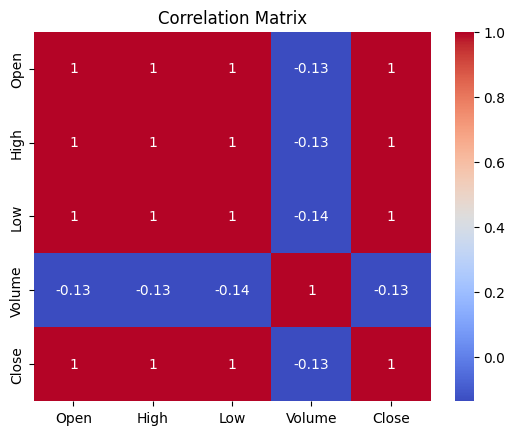

In [10]:
pairplott(apple)
correlation(apple)

Dari Visualisasi diatas kita dapat melihat bahwa hampir semua kolom kecuali Volum memiliki korelasi positif yang kuat antara yang satu dengan yang lain dengan angka 1 sebagai indikasinya.

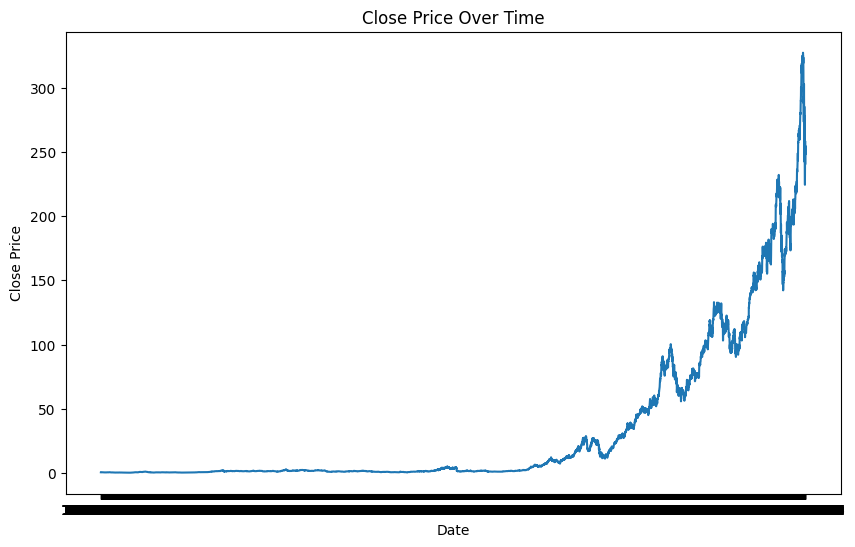

In [11]:
close_price(apple)

Dalam visualisasi Close Price Over Time yang ditampilkan, grafik menunjukkan perubahan harga penutupan saham Apple seiring berjalannya waktu. Dari grafik tersebut, dapat dilihat bahwa ada fluktuasi harga yang terjadi dari tahun ke tahun, dengan tren pertumbuhan yang umumnya meningkat seiring waktu. Namun, pada akhir periode yang ditampilkan dalam dataset, terlihat adanya penurunan harga yang signifikan.

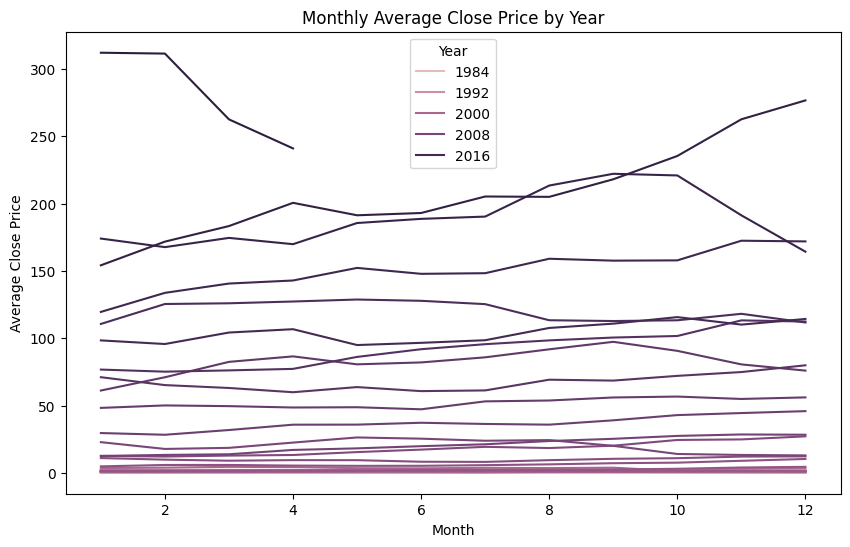

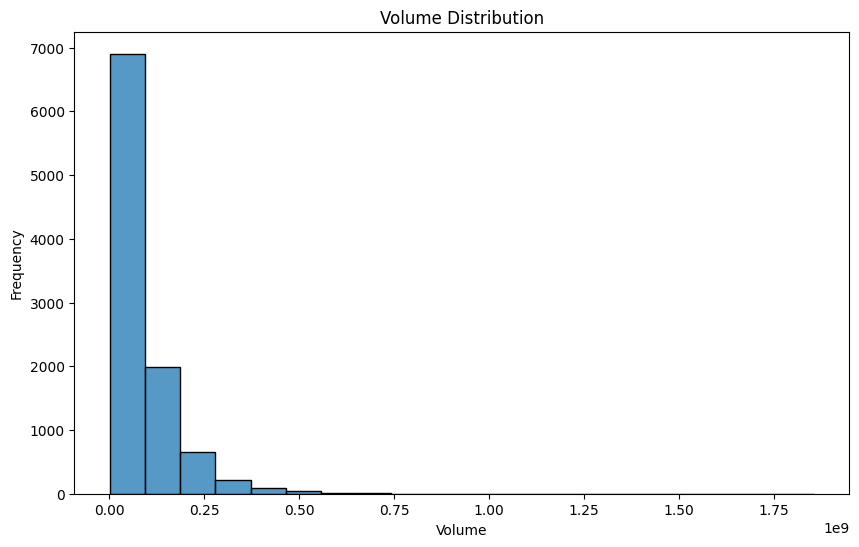

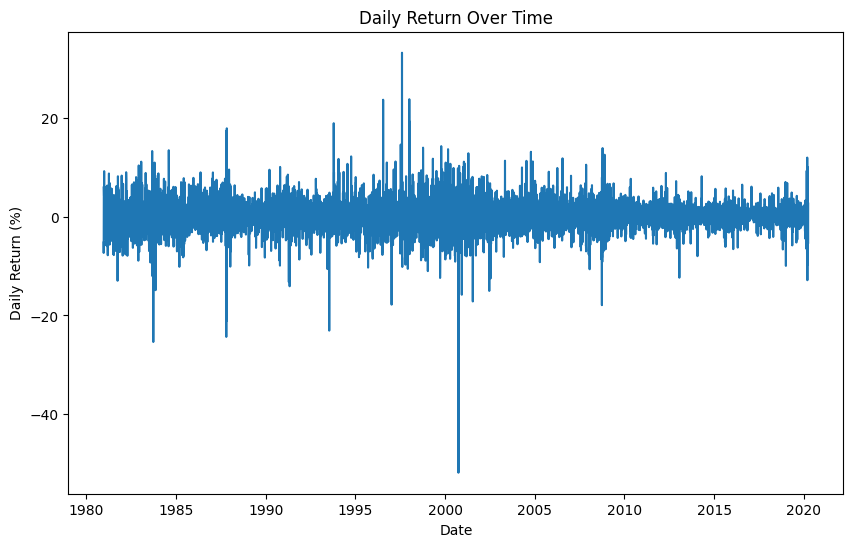

In [12]:
analyze_stock_data(apple)

- Dataset pada Apple Inc. tidak terdistribusi secara normal
- Pada range tahun 2000 - 2003 ditemukan daily return yang melebih -40

# **Advanced Micro Devices, Inc. Analysis**

In [13]:
# menampilkan informasi tentang dataset
amd.info()

# menampilkan ringkasan statistik datase
amd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10098 non-null  object 
 1   Open       10098 non-null  float64
 2   High       10098 non-null  float64
 3   Low        10098 non-null  float64
 4   Close      10098 non-null  float64
 5   Adj Close  10098 non-null  float64
 6   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 552.4+ KB


,Open,High,Low,Close,Adj Close,Volume
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,1.009800e+04
mean,10.889136,11.462153,10.958702,11.210802,11.210802,1.451625e+07
std,8.615288,8.475056,8.077069,8.283645,8.283645,2.396199e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.562500,5.062500,4.812500,4.937500,4.937500,1.098600e+06
50%,9.062500,9.280625,8.875000,9.062500,9.062500,5.518500e+06
75%,14.747500,15.000000,14.435625,14.707500,14.707500,1.742722e+07
max,58.439999,59.270000,57.509998,58.900002,58.900002,3.250584e+08


- Jumlah total entri dalam dataset AMD adalah 9909, mencakup periode waktu yang berbeda.
Data terdiri dari 7 kolom, yaitu 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', dan 'Volume'.
- Tidak ada nilai yang hilang dalam dataset, setiap kolom memiliki 9909 entri non-null.
- Harga saham AMD memiliki variasi yang signifikan, ditunjukkan oleh standar deviasi yang tinggi dalam kolom 'Open', 'High', 'Low', 'Close', dan 'Adj Close'.
- Harga saham rata-rata (mean) untuk kolom selain Volume adalah sekitar 10.89-11.21.
- Volume perdagangan rata-rata (mean) adalah sekitar 14.52 juta, menunjukkan tingkat aktivitas perdagangan yang cukup tinggi di pasar saham AMD.
- Harga saham AMD mencapai nilai maksimum tertinggi pada kolom selain Volume yaitu sekitar 58.44-59.27.

In [14]:
amd.duplicated().sum()

0

Tidak ditemukan data yang duplikat pada dataset AMD Inc.

In [15]:
amd.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Tidak ditemukan adanya missing values pada dataset AMD Inc.

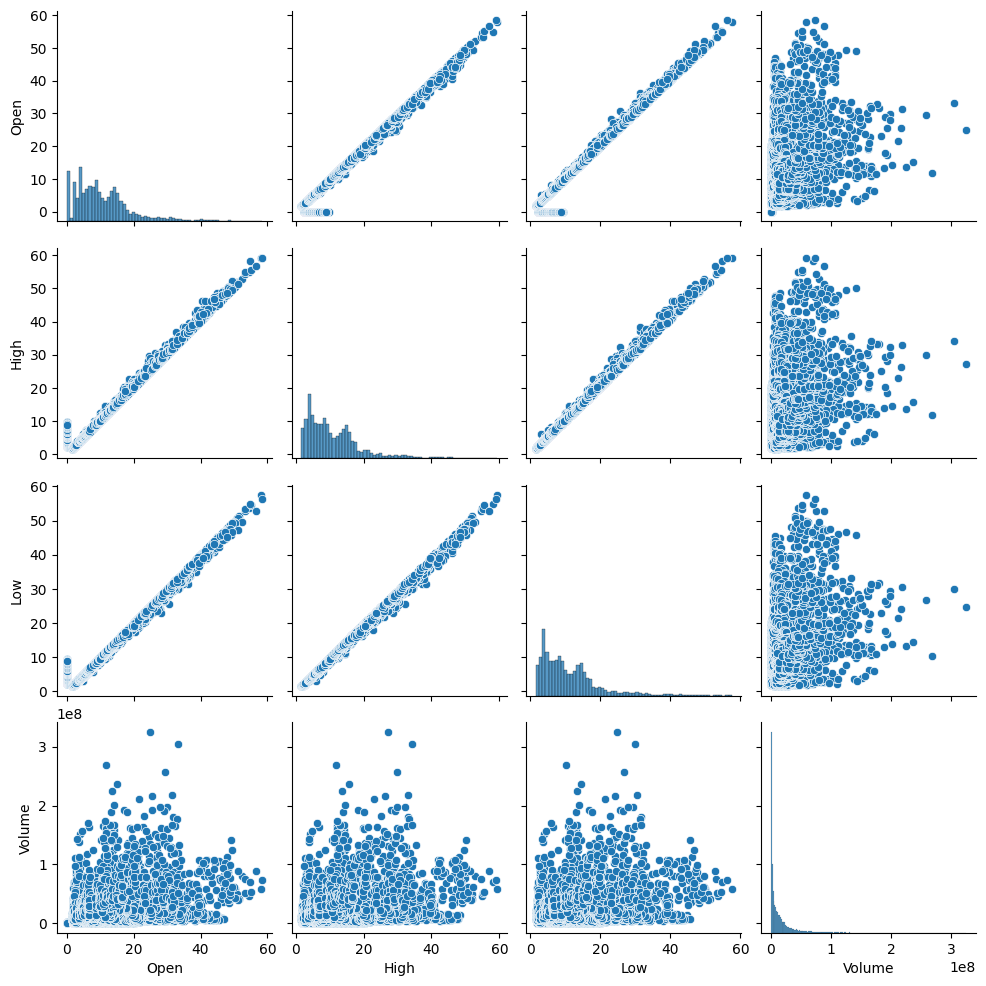

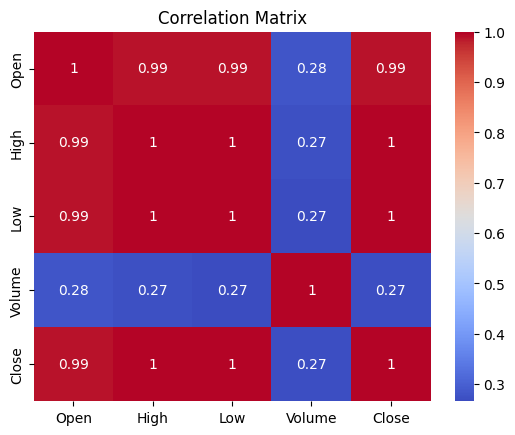

In [16]:
pairplott(amd)
correlation(amd)

Dari Visualisasi diatas kita dapat melihat bahwa hampir semua kolom kecuali Volum memiliki korelasi positif yang kuat antara yang satu dengan yang lain dengan angka 1 sebagai indikasinya.

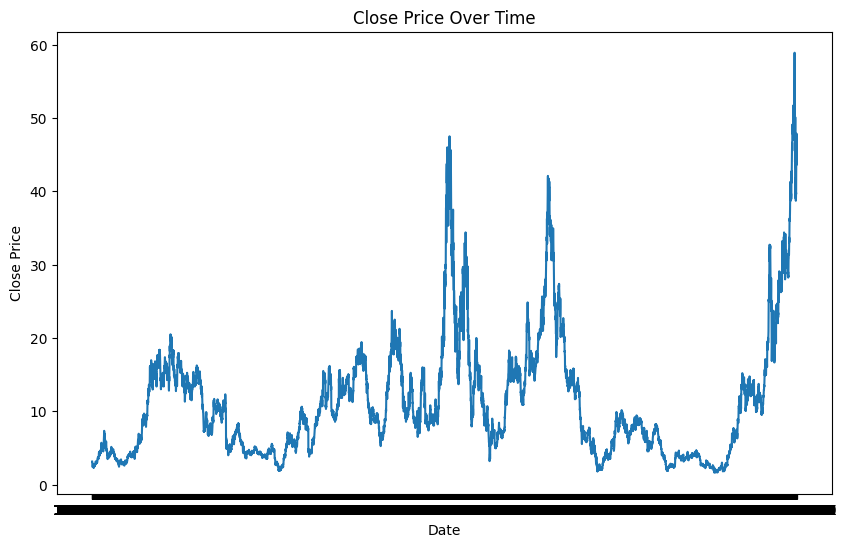

In [17]:
close_price(amd)

Dalam visualisasi Close Price Over Time untuk perusahaan AMD grafik menunjukkan fluktuasi harga penutupan saham yang lebih tinggi dan sifat yang tidak terduga. Dari grafik tersebut, dapat dilihat bahwa harga penutupan saham AMD mengalami fluktuasi yang lebih signifikan dan sulit diprediksi dibandingkan dengan perusahaan Apple. Tren harga juga menunjukkan volatilitas yang tinggi, dengan kemungkinan kenaikan dan penurunan yang cepat dan tajam. Pada akhir periode dataset, terlihat adanya penurunan harga yang dapat menjadi penanda dari situasi pasar atau faktor-faktor lain yang mempengaruhi harga saham AMD.

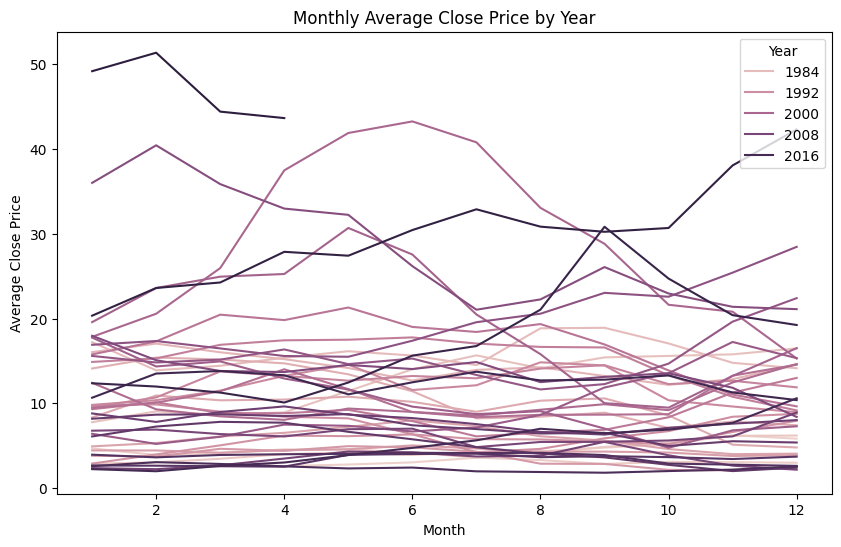

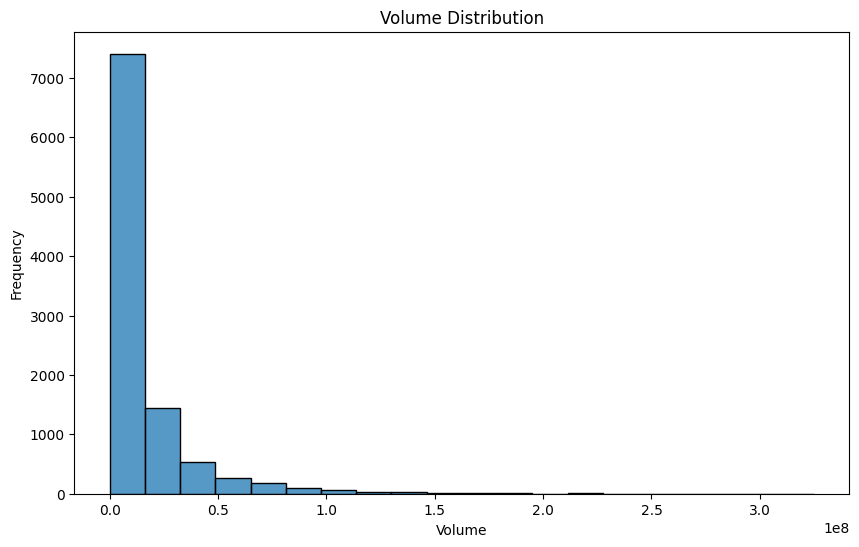

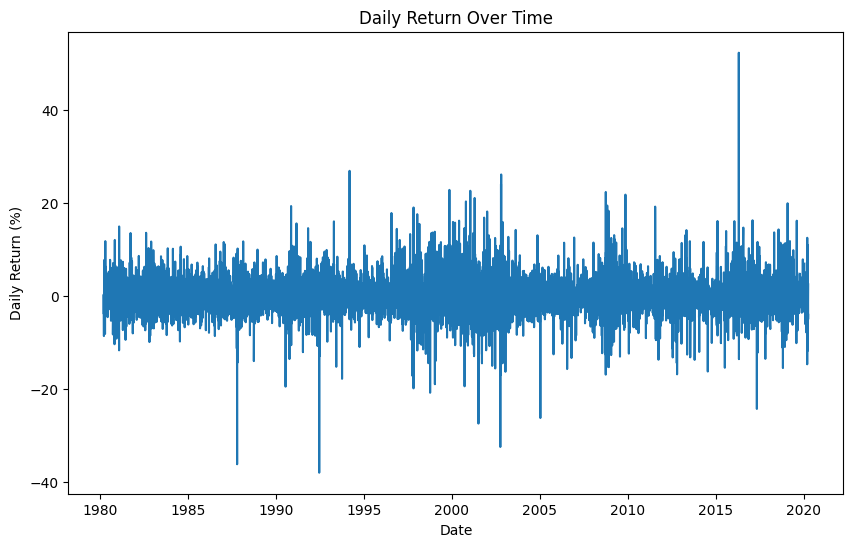

In [18]:
analyze_stock_data(amd)

- Dataset pada AMD Inc. tidak terdistribusi secara normal
- Pada range tahun 2015 - 2020 ditemukan daily return yang tertinggi dimana hal tersebut melebihi 40

# **Data Pre-processing**

In [19]:
# Memisahkan variabel independen (x) dan variabel dependen (y)
x = np.array(apple[['Open', 'High', 'Low', 'Volume']])
y = np.array(apple['Close']) 

X = np.array(amd[['Open', 'High', 'Low', 'Volume']])
Y = np.array(amd['Close']) 

Menentukan variabel dependen dan independen dengan Close sebagai Y

In [20]:
# Membaca data dari CSV dan mengkonversi kolom 'Date' menjadi datetime
apple['Date'] = pd.to_datetime(apple['Date'])
amd['Date'] = pd.to_datetime(amd['Date'])

# Mengambil kolom 'Date' dan 'Close' sebagai input dan output
data_apple = apple[['Date', 'Close']].copy()
data_amd = amd[['Date', 'Close']].copy()

# Praproses data
data_apple['DayOfWeek'] = data_apple['Date'].dt.dayofweek  # Menambah kolom 'DayOfWeek' sebagai hari dalam seminggu (Senin = 0, Jumat = 4)
data_amd['DayOfWeek'] = data_amd['Date'].dt.dayofweek 

# Mengatur window size dan horizon
window_size = 5  # Jumlah hari dalam window
horizon = 1  # Jumlah hari untuk horizon

In [21]:
# Apple Inc. Dataset
x = []
y = []
for i in range(len(data_apple) - window_size - horizon + 1):
    x.append(data_apple.iloc[i:i + window_size]['Close'].values)
    y.append(data_apple.iloc[i + window_size + horizon - 1]['Close'])
x = pd.DataFrame(x)
y = pd.Series(y)

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1111, shuffle=False)

x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

# AMD Dataset
X = []
Y = []
for i in range(len(data_amd) - window_size - horizon + 1):
    X.append(data_amd.iloc[i:i + window_size]['Close'].values)
    Y.append(data_amd.iloc[i + window_size + horizon - 1]['Close'])
X = pd.DataFrame(X)
Y = pd.Series(Y)

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.1111, shuffle=False)

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Menampilkan informasi tentang ukuran masing-masing set
print('Apple Inc. Dataset')
print("Train set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Test set size:", len(x_test))
print('')
print('Advanced Micro Devices Inc. Dataset')
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Apple Inc. Dataset
Train set size: 7922
Validation set size: 991
Test set size: 991

Advanced Micro Devices Inc. Dataset
Train set size: 8073
Validation set size: 1010
Test set size: 1010


In [22]:
# from sklearn.preprocessing import MinMaxScaler

# # Normalisasi dan scaling untuk dataset Apple Inc.
# scaler_apple = MinMaxScaler()
# x_train_scaled = scaler_apple.fit_transform(x_train)
# x_val_scaled = scaler_apple.transform(x_val)
# x_test_scaled = scaler_apple.transform(x_test)

# # Normalisasi dan scaling untuk dataset AMD
# scaler_amd = MinMaxScaler()
# X_train_scaled = scaler_amd.fit_transform(X_train)
# X_val_scaled = scaler_amd.transform(X_val)
# X_test_scaled = scaler_amd.transform(X_test)

Saya memutuskan untuk tidak melakukan scaling, karena ketika melakukan scaling hasil evaluasi yang didapati tidak memuaskan dan jauh daripada data yang tidak di scale. Terkadang ketika kita mengolah data time-series dengan LSTM. memang disarankan untuk melakukan scaling, namun terdapat beberapa case jika hasil yang diperoleh tidak sesuai. ada kalanya untuk tidak menggunakan scaling.

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb 

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# x_train_scaled = np.reshape(x_train_scaled, (x_train_scaled.shape[0], x_train_scaled.shape[1], 1))
# x_val_scaled = np.reshape(x_val_scaled, (x_val_scaled.shape[0], x_val_scaled.shape[1], 1))
# x_test_scaled = np.reshape(x_test_scaled, (x_test_scaled.shape[0], x_test_scaled.shape[1], 1))

# X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
# X_val_scaled = np.reshape(X_val_scaled, (X_val_scaled.shape[0], X_val_scaled.shape[1], 1))
# X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# **Baseline Architecture (LSTM)**



In [24]:
#pip install -U numpy==1.18.5

In [25]:
def evaluate_model(model, x_test, y_test):
    # Menggunakan model untuk melakukan prediksi
    y_pred = model.predict(x_test)

    # Mengubah bentuk array prediksi dan target menjadi 1 dimensi
    y_pred = np.squeeze(y_pred)
    y_test = np.squeeze(y_test)

    # Menghitung RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Menghitung MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Menghitung MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Menampilkan hasil evaluasi
    print('RMSE:', rmse)
    print('MAE:', mae)
    print('MAPE:', mape)

Membuat function evaluasi yang terdiri dari RMSE, MAE, dan MAPE untuk melakukan perhitungan dari testing model

## Apple Baseline Architecture (LSTM)

In [71]:
# Menyiapkan model LSTM
model_lstm_apple = Sequential()
model_lstm_apple.add(LSTM(units=50, activation='relu', input_shape=(window_size, 1)))
model_lstm_apple.add(Dense(units=1))

# Menampilkan ringkasan model
model_lstm_apple.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 50)                10400     
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


Diatas merupakan arsitektur Apple Inc. baseline dengan LSTM (units=50) dan layer akhir berupa node Perceptron dengan units=1. dengan activation function menggunakan ReLU. 

- Model LSTM Apple memiliki total 10,451 parameter yang akan dipelajari selama proses pelatihan.
- Model terdiri dari dua lapisan, yaitu lapisan LSTM dan lapisan Dense.
- Semua parameter dapat dilatih dengan Model Baseline (LSTM) diatas

In [72]:
# Compile model
model_lstm_apple.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
history_lstm_apple = model_lstm_apple.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
248/248 [==============================] - 2s 4ms/step - loss: 11.5940 - val_loss: 4.3879
Epoch 2/10
248/248 [==============================] - 1s 3ms/step - loss: 0.2525 - val_loss: 5.5569
Epoch 3/10
248/248 [==============================] - 1s 3ms/step - loss: 0.2444 - val_loss: 6.7683
Epoch 4/10
248/248 [==============================] - 1s 3ms/step - loss: 0.2395 - val_loss: 5.9677
Epoch 5/10
248/248 [==============================] - 1s 3ms/step - loss: 0.2648 - val_loss: 4.7169
Epoch 6/10
248/248 [==============================] - 1s 3ms/step - loss: 0.1998 - val_loss: 6.7103
Epoch 7/10
248/248 [==============================] - 1s 3ms/step - loss: 0.1734 - val_loss: 3.1339

Selama proses training, terlihat peningkatan dalam mengurangi loss, baik data train maupun validasi. Namun, terdapat fluktuasi dalam beberapa epoch yang menunjukkan adanya kompleksitas dalam memodelkan pola harga saham Apple.

In [73]:
evaluate_model(model_lstm_apple, x_test, y_test)

31/31 [==============================] - 0s 2ms/step
RMSE: 8.210028902383627
MAE: 5.219526927959545
MAPE: 0.02633131337572371


31/31 [==============================] - 0s 2ms/step


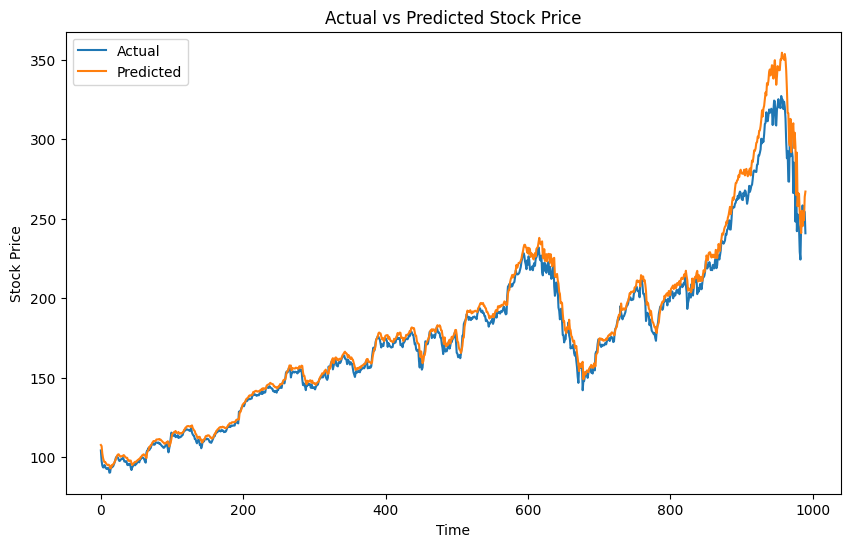

In [74]:
time = np.arange(len(y_test))

y_pred = model_lstm_apple.predict(x_test)
y_pred = np.squeeze(y_pred)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(time, y_test, label='Actual')
plt.plot(time, y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.show()

Pada visualisasi diatas menunjukkan bahwa prediksi model cukup mendekati dengan nilai aktual. Hal ini menandakan bahwa model memiliki kemampuan yang baik dalam memprediksi pergerakan harga saham perusahaan Apple.

## Baseline Apple Model (LSTM) Modification

### Modification Apple (LSTM) Model - 1

In [75]:
# Membangun arsitektur model
model_lstm_apple_mod1 = Sequential()
model_lstm_apple_mod1.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
model_lstm_apple_mod1.add(LSTM(units=50, activation='relu'))  # Tambahkan lapisan LSTM tambahan
model_lstm_apple_mod1.add(Dense(units=1))  # Tambahkan lapisan Dense tambahan

model_lstm_apple_mod1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_25 (LSTM)              (None, 50)                20200     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


Saya melakukan modifikasi pada baseline dimana pada model_lstm_apple_mod1 terdapat penambahan lapisan LSTM di antara lapisan pertama dan lapisan Dense. Tujuan dari tambahan lapisan LSTM ini adalah untuk memperkenalkan lebih banyak kompleksitas dan kapasitas model dalam mempelajari pola dan tren yang lebih kompleks.

In [76]:
# Kompilasi model
model_lstm_apple_mod1.compile(optimizer='adam', loss='mse')

# Melatih model
history = model_lstm_apple_mod1.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
248/248 [==============================] - 3s 6ms/step - loss: 14.3919 - val_loss: 6.1968
Epoch 2/10
248/248 [==============================] - 1s 5ms/step - loss: 0.3347 - val_loss: 5.9057
Epoch 3/10
248/248 [==============================] - 1s 5ms/step - loss: 0.3401 - val_loss: 5.7885
Epoch 4/10
248/248 [==============================] - 1s 6ms/step - loss: 0.3251 - val_loss: 5.1579
Epoch 5/10
248/248 [==============================] - 1s 5ms/step - loss: 0.2798 - val_loss: 13.7162
Epoch 6/10
248/248 [==============================] - 1s 5ms/step - loss: 0.2523 - val_loss: 3.9602
Epoch 7/10
248/248 [==============================] - 1s 5ms/step - loss: 0.2332 - val_loss: 11.0715

In [77]:
evaluate_model(model_lstm_apple_mod1, x_test, y_test)

31/31 [==============================] - 0s 3ms/step
RMSE: 6.0690248098754145
MAE: 4.172432246049405
MAPE: 0.02190866671034776


31/31 [==============================] - 0s 2ms/step


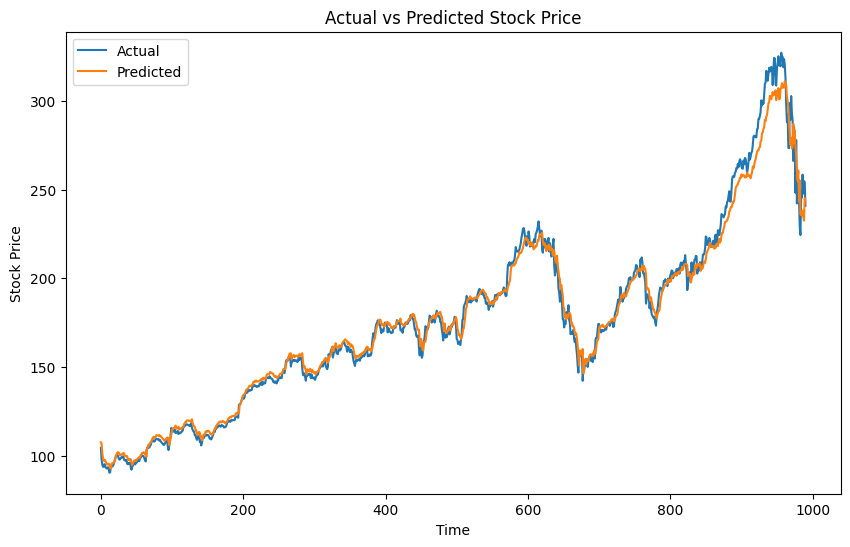

In [78]:
time = np.arange(len(y_test))

y_pred = model_lstm_apple_mod1.predict(x_test)
y_pred = np.squeeze(y_pred)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(time, y_test, label='Actual')
plt.plot(time, y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.show()

Pada model Visualisasi kali ini, hasil yang didapati lebih baik daripada hasil pada model baseline. Hal ini dapat dilihat dari gari prediksi dan aktual yang jaraknya lebih dekat bila dibandingkan dengan visualisasi pada model baseline apple diatas. 

## Advanced Micro Devices Baseline Architecture (LSTM)

In [34]:
# Menyiapkan model LSTM
model_lstm_amd = Sequential()
model_lstm_amd.add(LSTM(units=50, activation='relu', input_shape=(window_size, 1)))
model_lstm_amd.add(Dense(units=1))

# Menampilkan ringkasan model
model_lstm_amd.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile model
model_lstm_amd.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
history_lstm_amd = model_lstm_amd.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
253/253 [==============================] - 2s 4ms/step - loss: 9.2342 - val_loss: 0.1077
Epoch 2/10
253/253 [==============================] - 1s 4ms/step - loss: 0.4649 - val_loss: 0.0449
Epoch 3/10
253/253 [==============================] - 1s 3ms/step - loss: 0.3672 - val_loss: 0.0306
Epoch 4/10
253/253 [==============================] - 1s 3ms/step - loss: 0.3467 - val_loss: 0.0309
Epoch 5/10
253/253 [==============================] - 1s 4ms/step - loss: 0.3551 - val_loss: 0.0351
Epoch 6/10
253/253 [==============================] - 1s 3ms/step - loss: 0.3231 - val_loss: 0.0249
Epoch 7/10
253/253 [==============================] - 1s 4ms/step - loss: 0.3228 - val_loss: 0.0229

In [36]:
evaluate_model(model_lstm_amd, X_test, Y_test)

32/32 [==============================] - 0s 2ms/step
RMSE: 1.1750104992743209
MAE: 0.7134649458498058
MAPE: 0.03320015627518481


32/32 [==============================] - 0s 2ms/step


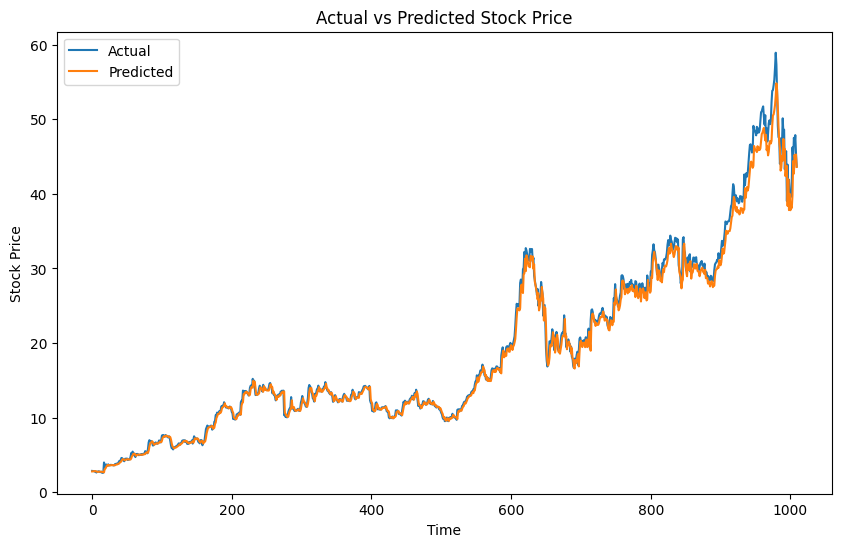

In [37]:
time = np.arange(len(Y_test))

Y_pred = model_lstm_amd.predict(X_test)
Y_pred = np.squeeze(Y_pred)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(time, Y_test, label='Actual')
plt.plot(time, Y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.show()

### Modification Advanced Micro Devices (LSTM) Model - 1

In [38]:
# Membangun arsitektur model
model_lstm_amd_mod1 = Sequential()
model_lstm_amd_mod1.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
model_lstm_amd_mod1.add(LSTM(units=50, activation='relu'))  # Tambahkan lapisan LSTM tambahan
model_lstm_amd_mod1.add(Dense(units=1))  # Tambahkan lapisan Dense tambahan

model_lstm_amd_mod1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Kompilasi model
model_lstm_amd_mod1.compile(optimizer='adam', loss='mse')

# Melatih model
history = model_lstm_amd_mod1.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
253/253 [==============================] - 5s 10ms/step - loss: 8.7443 - val_loss: 0.0830
Epoch 2/10
253/253 [==============================] - 2s 7ms/step - loss: 0.6613 - val_loss: 0.0387
Epoch 3/10
253/253 [==============================] - 2s 7ms/step - loss: 0.4993 - val_loss: 0.0304
Epoch 4/10
253/253 [==============================] - 2s 7ms/step - loss: 0.4487 - val_loss: 0.0231
Epoch 5/10
253/253 [==============================] - 2s 7ms/step - loss: 0.4013 - val_loss: 0.0331
Epoch 6/10
253/253 [==============================] - 2s 7ms/step - loss: 0.3873 - val_loss: 0.0431
Epoch 7/10
253/253 [==============================] - 2s 7ms/step - loss: 0.3583 - val_loss: 0.0188

In [40]:
evaluate_model(model_lstm_amd_mod1, X_test, Y_test)

32/32 [==============================] - 0s 3ms/step
RMSE: 0.9747779627353396
MAE: 0.576703682984456
MAPE: 0.03022561492844649


32/32 [==============================] - 0s 2ms/step


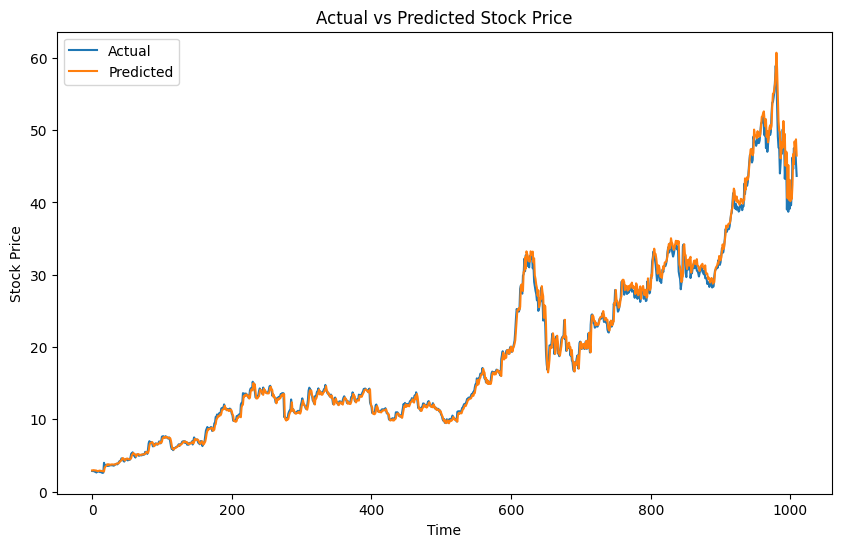

In [41]:
time = np.arange(len(Y_test))

Y_pred = model_lstm_amd_mod1.predict(X_test)
Y_pred = np.squeeze(Y_pred)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(time, Y_test, label='Actual')
plt.plot(time, Y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.show()

# **Conclusion**

Secara keseluruhan, berikut adalah kesimpulan dari perbandingan antara model baseline dan model modifikasi:

Baseline Model:
- Model menggunakan satu lapisan LSTM dengan 50 unit dan lapisan Dense sebagai output. Meskipun memiliki arsitektur yang lebih sederhana, model ini mampu menghasilkan prediksi yang cukup baik untuk harga saham perusahaan Apple dan AMD.

Model Modifikasi:
- Model menggunakan dua lapisan LSTM dengan 50 unit masing-masing dan lapisan Dense sebagai output.
Penambahan lapisan LSTM tambahan memberikan model kapasitas yang lebih tinggi dalam mempelajari pola dan tren yang kompleks. Model modifikasi menghasilkan prediksi yang lebih baik daripada baseline model, dengan menunjukkan peningkatan kinerja dalam memprediksi harga saham perusahaan Apple dan AMD.

Berdasarkan perbandingan antara model baseline dan model modifikasi, dapat disimpulkan bahwa model modifikasi dengan penambahan lapisan LSTM tambahan memberikan hasil yang lebih baik dari baseline model dalam memprediksi harga saham perusahaan Apple dan AMD. Penambahan lapisan LSTM bisa memberikan model kapasitas yang lebih tinggi dalam mempelajari pola dan tren yang kompleks. Hasil evaluasi menunjukkan bahwa model modifikasi menghasilkan prediksi yang lebih akurat dan mendekati harga saham aktual.

Secara keseluruhan, meskipun model modifikasi memberikan hasil yang lebih baik, Namun kesimpulan ini hanya berlaku untuk dataset dan masalah tertentu. Penambahan lapisan LSTM pada model LSTM Apple dan AMD dapat memberikan peningkatkan kemampuan prediksi dan kualitas hasil. Kinerja model dapat bervariasi tergantung pada dataset yang digunakan dan kompleksitas pola yang terdapat dalam data tersebut. Diperlukan adanya riset tambahan mengenai dataset yang berbeda.

references: 
- https://papers.nips.cc/paper_files/paper/2013/file/1ff8a7b5dc7a7d1f0ed65aaa29c04b1e-Paper.pdf 
- https://arxiv.org/pdf/1312.6026.pdf 
- https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb 